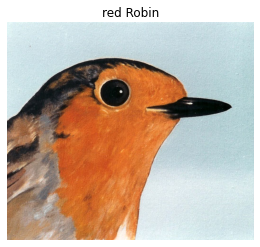

In [5]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import os

#in case you have not added redRobin to your pythonpath, you can do so temporarily using:
import sys
sys.path.append(r"K:\vanderVoortN\redRobin\src")

#dedicated CELFIS imports
import redRobin
#from ltImage import LtImage, ImChannel
import ltImage


debug = False
if debug:
    from importlib import reload
    print(sys.path.pop(1))
    
    
# this beautiful icon is courtesy of artist Noëlle Koppers - https://noellekoppers.nl/
from PIL import Image
import matplotlib.image as mpimg
path = os.path.join(os.path.split(os.path.split(redRobin.__file__)[0])[0], 'icon', '1999roodborst30x30cm.jpg')
plt.title("red Robin")
plt.axis('off')
image = mpimg.imread(path)
plt.imshow(image)
plt.show()

## set the channel parameters

In [2]:
reload(ltImage)
#set the minimum and maximum TAC range that you want to collect
tacmin = 0
tacmax = 2**15
#initilaize the image channels contained in the ptu file
GS = ltImage.ImChannel("GS", [0], tacmin, tacmax, 1)
#-"GS" is the name that is given to the channel. G stand for Green or donor emission upon donor excitation. 
# S (senkrecht) stands for perpendicular polarization
#-[0] is the list of channels you want to add. Here only photons detected by detector '0' are added - the 
# detector that measures perpendicular donor photons
#-tacmin
#-tacmax
#-1 is the line_id of the image channel. We are using Alternating Line Excitation (ALEX).
# in line 1, only the donor is excitated, but emission happens from the donor (G) and from the acceptor via FRET (R)
# in line 2, only the acceptor is excited and only the acceptor emits (Y)

#initialize the other channels
GP = ltImage.ImChannel("GP", [2], tacmin, tacmax, 1)
RS = ltImage.ImChannel("RS", [1], tacmin, tacmax, 1)
RP = ltImage.ImChannel("RP", [3], tacmin, tacmax, 1)
YS = ltImage.ImChannel("YS", [1], tacmin, tacmax, 2)
YP = ltImage.ImChannel("YP", [3], tacmin, tacmax, 2)
channelLst = [GS, GP, RS, RP, YS, YP]

## set the image reading parameters

In [3]:
#here you can experiment parameters, if you don't set them, default parameters will be used.
#we put all the options in a dictionary
kwdict = {}
#most of the time 32768 time bins is more than we need, so we downsample 32x to only 1024 bins
kwdict['ntacs'] = 1024
#bin width after binning
kwdict['dt_glob'] = 0.032
# because we use line-interleaved measurements, we need to specify the line ids. 
# In this example, we use one line for donor excitation ('1') and one line for acceptor excitation ('2').
kwdict['line_setup'] = [1,2]
# the g-factor is the relative detection efficiency of perpendicular and parallel detected light. 
# Here we follow Lakowicz. definition
kwdict['g_factor'] = 1.087


## set the experiment parameters

In [5]:
kwdict['timeLst'] = [0,10]
#you can specify the phenotype for all the masks. E.g., 'dead' or 'alive'.
#the first ptu file contains 6 masks, the second ptu file contains 12 masks.
kwdict['cell_phenotypeLst'] = ['live']*18

#per measurement
#sample name
kwdict['sampleType'] = 'CTLA4'#e.g., CTLA4
#cells for this experiment were transfected with 100 ng / 2 well transfection reagent
kwdict['sampleAddition'] = "100ng_transf"
#you can give your experiment a name
kwdict['experimentId'] = 'day3_CTLA4_100ng'
#if you do time series, you can specify the round, by default 0
kwdict['roundId'] = 0
# we want to calculate the store the brightness of each area of interest. 
#the power of the donor and acceptor excitation laser. That power typically varies daily. 
#It is used to correct laser power induced brightness variations.
kwdict['powerD'] = 6.9 #microW
kwdict['powerA'] = 7.5 #microW
#Number of accumulated frames, also needed to normalize the brightness
kwdict['Nframes'] = 20
#to construct Magic angle and anisotropy decays, we need to correct for the shift between the parallel and 
# perpendicular decays. ignore this setting if you dont use Parallel perpendicular detection
kwdict['PSshift'] = 9


#these experiments are determined from separate measurements as described in the paper.
#they are valid for the whole series of experiments
#the fraction of molecules that are in the membrane, as determined from live-cell FCS.
#if you are interested in cytoplasmic proteins, you may probably just set this to one
kwdict['pMembrane'] = 0.621 # +-0.061
#confocal area through membrane
kwdict['Acf'] = 0.27 #microm2
#maturation efficiency
kwdict['maturationD'] = 0.8
kwdict['maturationA'] = 0.8
#inverse proximity concentration as defined in the paper
kwdict['kprox'] = 3.9803e-05 #1 / concentration
#Normalized brightness in Hz per molecule per microW excitation power.
kwdict['BnormDonor'] = 814
kwdict['BnormAcceptor'] = 264

# Run the analysis

In [16]:
#the directory that contains the ptu files.
ptudir = r'K:\vanderVoortN\redRobin\testData'
# now we initialize the object that will contain our data
# by doing so, subdirectories are automatically generated for storing the TSCPC decacs ("TAC"), 
# storing the 2D images ("images") and storing the results in a .csv file ("results")
# [optional]: you can analyze only a selection of your dataset, using the dataselect keyword
#kwdict['dataselect'] = [0,2]
CTLA4set = redRobin.sampleSet(ptudir, channelLst, **kwdict)

In [17]:
#now we analyze all the ptu files, as these are large 3D arrays, it takes a little time
CTLA4set.analyzeDir(maskdirs = 'automatic')

number of records is 9815533
loading file PQSpcm_2022-03-16_14-12-29area_1x_3.538y_-0.486.ptu


K:\vanderVoortN\Seidel\Code\batchplot.py:122: RuntimeWarning: invalid value encountered in true_divide
  r = Fr / F


number of records is 20033310
loading file PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304.ptu


### results of the image statistics

In [18]:
#Let's have a look in the images, TAC and results folders for the output files that have been generated
#particularly, let's have a look at the image statistics ('imstats') table that has been created
CTLA4set.imstats

,ptuname,maskid,time,sampleType,sampleAddition,experimentId,roundId,N_GS,surface_GS,N_GP,...,rateGtot,rateRtot,rateYtot,rateGtot_LPC,rateRtot_LPC,rateYtot_LPC,concG,concY,concYconcG,concTotal
PQSpcm_2022-03-16_14-12-29area_1x_3.538y_-0.486Mask1,PQSpcm_2022-03-16_14-12-29area_1x_3.538y_-0.486,Mask1,0.0,CTLA4,100ng_transf,day3_CTLA4_100ng,0.0,569829.0,85205.0,1405668.0,...,229067.033082,32564.557461,157151.470878,33198.120736,4719.501081,20953.529450,117.253805,228.187110,1.946096,345.440915
PQSpcm_2022-03-16_14-12-29area_1x_3.538y_-0.486Mask2,PQSpcm_2022-03-16_14-12-29area_1x_3.538y_-0.486,Mask2,0.0,CTLA4,100ng_transf,day3_CTLA4_100ng,0.0,205574.0,49594.0,506250.0,...,136671.082695,20261.697675,87600.368642,19807.403289,2936.477924,11680.049152,69.958580,127.197505,1.818183,197.156085
PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask1,PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304,Mask1,10.0,CTLA4,100ng_transf,day3_CTLA4_100ng,0.0,235561.0,44318.0,598160.0,...,185258.982734,42244.739240,302278.070351,26849.127933,6122.425977,40303.742713,94.829537,438.913865,4.628451,533.743401
PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask2,PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304,Mask2,10.0,CTLA4,100ng_transf,day3_CTLA4_100ng,0.0,177312.0,35906.0,447972.0,...,171508.036645,38164.737506,263038.290636,24856.237195,5531.121378,35071.772085,87.790764,381.936912,4.350536,469.727676
PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask3,PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304,Mask3,10.0,CTLA4,100ng_transf,day3_CTLA4_100ng,0.0,456985.0,125064.0,1123652.0,...,120467.117347,27134.038061,164241.172481,17459.002514,3932.469284,21898.822997,61.664167,238.481500,3.867424,300.145668
PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask4,PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304,Mask4,10.0,CTLA4,100ng_transf,day3_CTLA4_100ng,0.0,429046.0,93067.0,1094948.0,...,160330.973247,36273.026627,243606.935078,23236.372934,5256.960381,32480.924677,82.069499,353.722191,4.310032,435.791690


# Fitting the decays

### D0 control

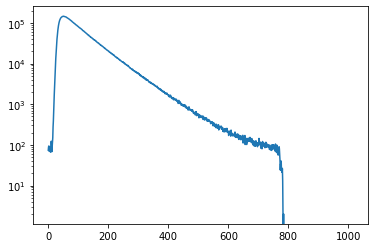

In [19]:
#we are going to load some D0 reference data I've prepared for you.
#normally this data is generated in the same way as you generate the DAdata
D0fname = os.path.join(ptudir, "PQSpcm_2022-03-16_17-45-50area_0x_14.338y_2.629Mask1_G_VM.dat")
D0dat = np.genfromtxt(D0fname)
plt.semilogy(D0dat)
plt.show()

### donor only calibrated donor acceptor fits

chi2 reduced is 1.65


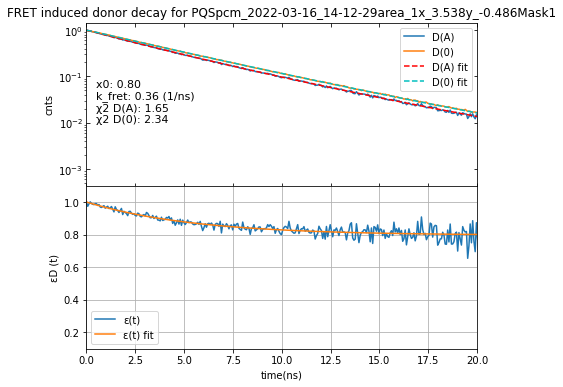

chi2 reduced is 1.81


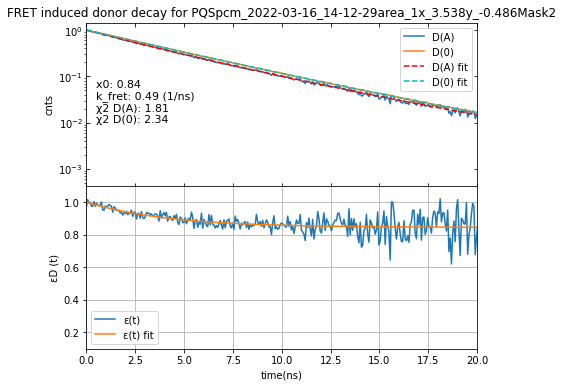

chi2 reduced is 1.63


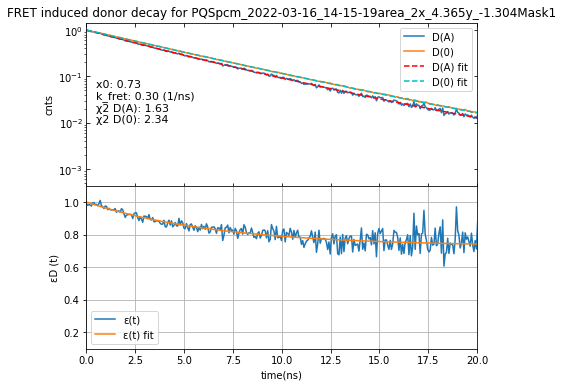

chi2 reduced is 1.55


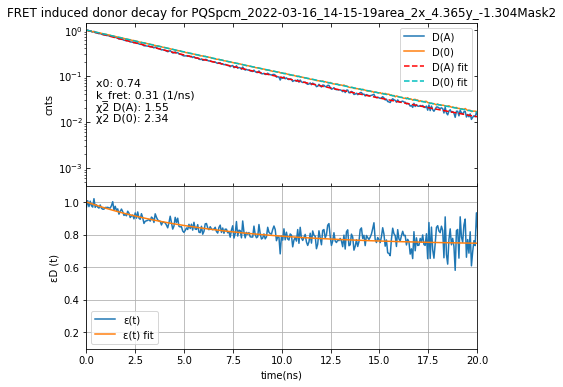

chi2 reduced is 1.86


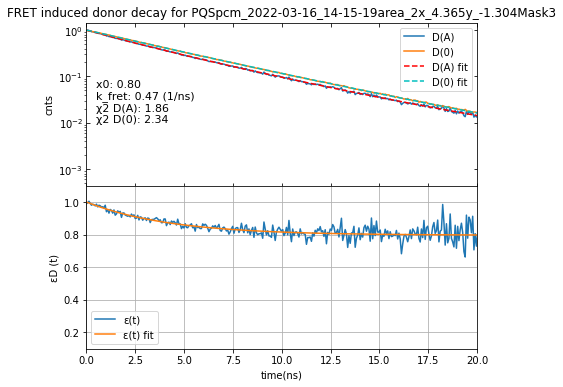

chi2 reduced is 1.55


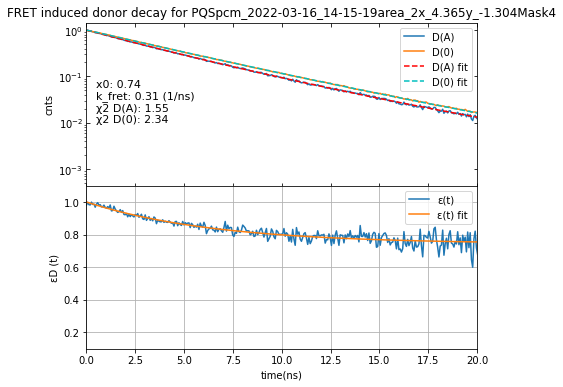

,xFRETD0DA,kFRETD0DA,chi2redD0DA
PQSpcm_2022-03-16_14-12-29area_1x_3.538y_-0.486Mask1,0.204445,0.362709,1.653301
PQSpcm_2022-03-16_14-12-29area_1x_3.538y_-0.486Mask2,0.155826,0.485025,1.813704
PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask1,0.272225,0.295738,1.625998
PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask2,0.264182,0.314956,1.548060
PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask3,0.203951,0.467369,1.858835
PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask4,0.257358,0.305031,1.551487


In [20]:
#we need to tell the programm which decay to fit
#by choise all the magic angle decays are stored under the P variable
# we want to get G-VM, which is stored under GP, entry 1 in channelLst
channelId = 1
decaytype = "VM"
CTLA4set.batchFit1ltD0DA(D0dat = D0dat, fitrange = (60,700), channelId = channelId,
                        decaytype = decaytype)

### Do simple two lifetime fit

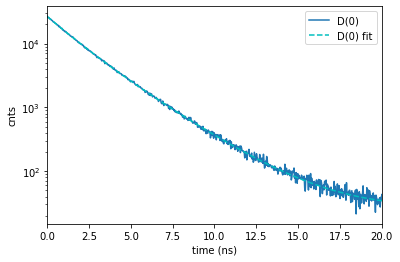

finished fitting with 2lt set PQSpcm_2022-03-16_14-12-29area_1x_3.538y_-0.486Mask1


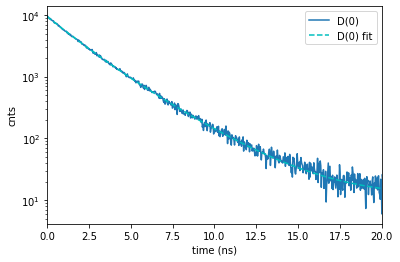

finished fitting with 2lt set PQSpcm_2022-03-16_14-12-29area_1x_3.538y_-0.486Mask2


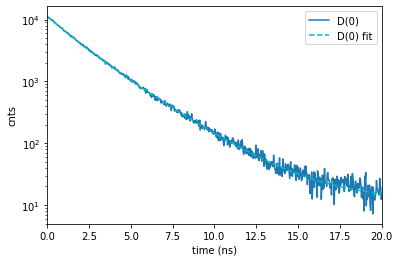

finished fitting with 2lt set PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask1


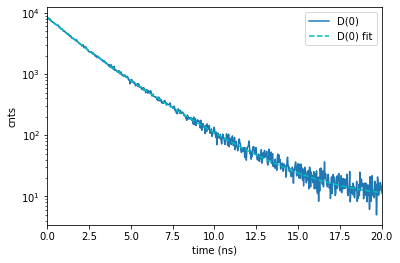

finished fitting with 2lt set PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask2


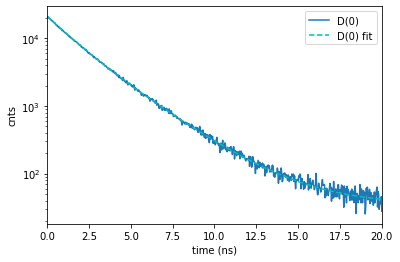

finished fitting with 2lt set PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask3


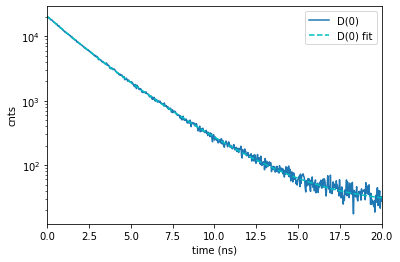

finished fitting with 2lt set PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask4


,x02lt,x12lt,tau02lt,tau12lt,bg2lt,tauf2lt,taux2lt,chi2red2lt
PQSpcm_2022-03-16_14-12-29area_1x_3.538y_-0.486Mask1,14281.692797,12452.901724,1.558072,2.728779,26.124646,2.265521,2.103384,1.666936
PQSpcm_2022-03-16_14-12-29area_1x_3.538y_-0.486Mask2,5810.884559,3654.285824,1.656897,2.915113,11.618234,2.317789,2.142665,1.809166
PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask1,6014.200256,5316.991290,1.520471,2.663159,12.342432,2.214780,2.056660,1.621911
PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask2,4710.082760,3779.670947,1.537456,2.706413,9.203276,2.221890,2.057880,1.551435
PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask3,10596.082421,10566.277667,1.457316,2.701270,35.584930,2.264546,2.078417,1.871894
PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304Mask4,11750.201479,8787.912894,1.574316,2.734003,25.353793,2.229532,2.070527,1.559265


In [21]:
#This simple two lifetime fit allows us to obtain the average fluorescence lifetimes taux
#combined with the donor only taux and xFRET, we can later use it to robustly determine the species Efficiency
CTLA4set.batchFit2lt(fitrange = (60,700), channelId = channelId,
                        decaytype = decaytype)

### merge all dataframes, correct for proximity FRET, calculate Especies

In [22]:
CTLA4set.mergeStatsAndProcess()

Text(0.5, 1.0, '$x_\\mathrm{FRET}$ increases with concentration for CTLA4')

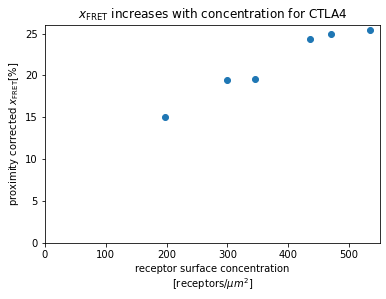

In [23]:
plt.plot(CTLA4set.mergedstats['concTotal'], CTLA4set.mergedstats['xFRET_cor']*100, "o")
plt.xlabel("receptor surface concentration\n" +r"[receptors/$\mu m^2$]")
plt.ylabel(r"proximity corrected $x_\mathrm{FRET}$[%]")
plt.ylim(0,None)
plt.xlim(0,None)
plt.title(r"$x_\mathrm{FRET}$ increases with concentration for CTLA4")
#decorate, axes labels etc.

Text(0.5, 1.0, 'Species Efficiency is constant with concentration')

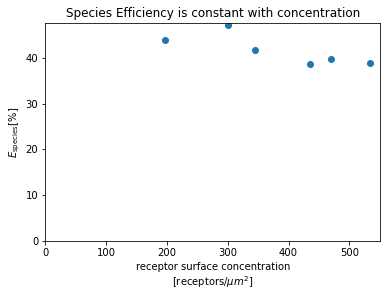

In [24]:
plt.plot(CTLA4set.mergedstats['concTotal'], CTLA4set.mergedstats['E_species2lt']*100, "o")
plt.xlabel("receptor surface concentration\n" +r"[receptors/$\mu m^2$]")
plt.ylabel(r"$E_\mathrm{species}$[%]")
plt.ylim(0,None)
plt.xlim(0,None)
plt.title("Species Efficiency is constant with concentration")
#decorate, axes labels etc.

# Let's do all those calculations in one cell

In [ ]:
#when analyzing a lot of datasets, you might want to have all commands neatly organized in one cell.
#one experiment is one cell
#set the kwdict as before
ptudir = r'K:\vanderVoortN\redRobin\testData'
CTLA4set = redRobin.sampleSet(ptudir, channelLst, **kwdict)
CTLA4set.analyzeDir(maskdirs = 'automatic')
#use the D0 data loaded above
channelId = 1
decaytype = "VM"
CTLA4set.batchFit1ltD0DA(D0dat = D0dat, fitrange = (60,700), channelId = channelId,
                        decaytype = decaytype)
CTLA4set.batchFit2lt(fitrange = (60,700), channelId = channelId,
                        decaytype = decaytype)
#TODO: add automated saving
CTLA4set.mergeStatsAndProcess()
#that's all folks!

# [optional] tools for creating masks

### auto generate the masks directory structure

In [26]:
#this creates the mask folder structure that is automatically generated by the program
#if the folder already exists, it is skipped
redRobin.tryMakeMaskDirs(ptudir)

### auto generate images containing the sum of all photons

In [208]:
# to make masks, you first need to look at your images
# you might want to choose your masks based on the sum of all channels for best signal, 
# or look for a specific structure in some of your channels.
# set the channel you want to look at for masking. 
# Here, we collect photons from all detectors, but only for the first line step. 
# (it is not implemented to collect from all linesteps)
AllFirstline = ltImage.ImChannel("AllFirstLine", [0,1,2,3], tacmin, tacmax, 1)
redRobin.createImagesForMasking(ptudir, AllFirstline, kwdict['line_setup'], kwdict['ntacs'])

number of records is 9815533
loading file PQSpcm_2022-03-16_14-12-29area_1x_3.538y_-0.486.ptu
number of records is 20033310
loading file PQSpcm_2022-03-16_14-15-19area_2x_4.365y_-1.304.ptu


In [216]:
#in the paper, we investigate the effect of bright ('hi') and dim ('lo') areas within the cells.
#below is a function that automatically generates the HiLo masks based on the existing masks
ptudir = r'K:\vanderVoortN\redRobin\testData'
redRobin.createSeriesHiLoMasks(ptudir, marker = 'AllFirstLine.tif')

done generating HiLo masks
